<a href="https://colab.research.google.com/github/pauljohn99/ML-learnings/blob/main/face1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/FacePerceiver/facer.git@main

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FacePerceiver/facer.git (to revision main) to /tmp/pip-req-build-eu4inxrb
  Running command git clone -q https://github.com/FacePerceiver/facer.git /tmp/pip-req-build-eu4inxrb
     |████████████████████████████████| 1.6 MB 18.8 MB/s 
  Created wheel for facer: filename=facer-0.0.1-py3-none-any.whl size=19184 sha256=fa9be8ad5696656771ffa6ede7deebcaabb54fe2bd519606d04200d9b2ea344b
  Stored in directory: /tmp/pip-ephem-wheel-cache-on0z7sq7/wheels/e6/7a/6f/b02a9f18536359d2c27a84337e23e9400155489013116fe34a
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=f35bbef2445191ad45e81c80f0f9a51469a2f77cfa45d64447a6c970f25b462b
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built facer validators


In [7]:
import sys
import torch
sys.path.append('..')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

Downloading: "https://github.com/elliottzheng/face-detection/releases/download/0.0.1/mobilenet0.25_Final.pth" to /root/.cache/torch/hub/checkpoints/mobilenet0.25_Final.pth


  0%|          | 0.00/1.71M [00:00<?, ?B/s]

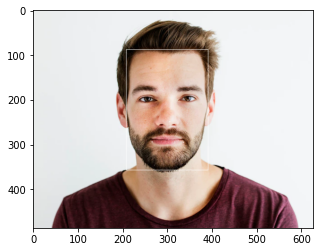

In [5]:
import facer

image = facer.hwc2bchw(facer.read_hwc('/content/portrait-white-man-isolated_53876-40306.webp')) # image: 1 x 3 x h x w
face_detector = facer.face_detector('retinaface/mobilenet', device='cpu')
faces = face_detector(image.to(device='cpu'))

facer.show_bchw(facer.draw_bchw(image, faces))

In [8]:
face_parser = facer.face_parser('farl/lapa/448', device=device)

Downloading: "https://github.com/FacePerceiver/facer/releases/download/models-v1/face_parsing.farl.lapa.main_ema_136500_jit191.pt" to /root/.cache/torch/hub/checkpoints/face_parsing.farl.lapa.main_ema_136500_jit191.pt


  0%|          | 0.00/617M [00:00<?, ?B/s]

In [9]:
with torch.inference_mode():
    faces = face_parser(image, faces)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 11, 487, 626])


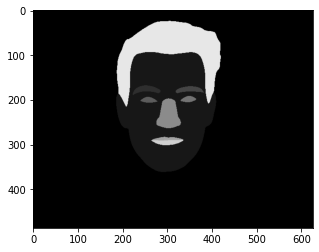

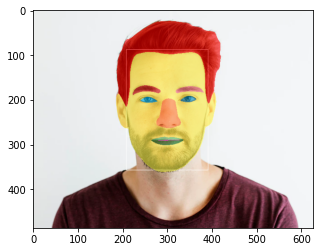

In [10]:
seg_logits = faces['seg']['logits']
seg_probs = seg_logits.softmax(dim=1)  # nfaces x nclasses x h x w
print(seg_probs.shape)
facer.show_bhw(seg_probs.argmax(dim=1).float()/seg_logits.size(1)*255)
facer.show_bchw(facer.draw_bchw(image, faces))